In [11]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, Dropout, Conv2D
from glob import glob
from tensorflow.keras.utils import plot_model
import warnings
warnings.filterwarnings('ignore')
import os


In [12]:
test_path = "C:\\Users\\hp\\BDA project\\DATASET\TEST"
train_path = "C:\\Users\\hp\\BDA project\\DATASET\\TRAIN"

In [14]:
x_data = [] 
y_data = [] 

for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array=cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array) 
        y_data.append(category.split("/")[-1])
        
data=pd.DataFrame({'image': x_data,'label': y_data})

 49%|████▉     | 6183/12565 [00:04<00:04, 1411.58it/s]


KeyboardInterrupt: 

In [27]:
data.to_clipboard(index=False)

In [28]:
from collections import Counter
Counter(y_data)

Counter({'C:\\Users\\hp\\BDA project\\DATASET\\TRAIN\\O': 12565,
         'C:\\Users\\hp\\BDA project\\DATASET\\TRAIN\\R': 9999})

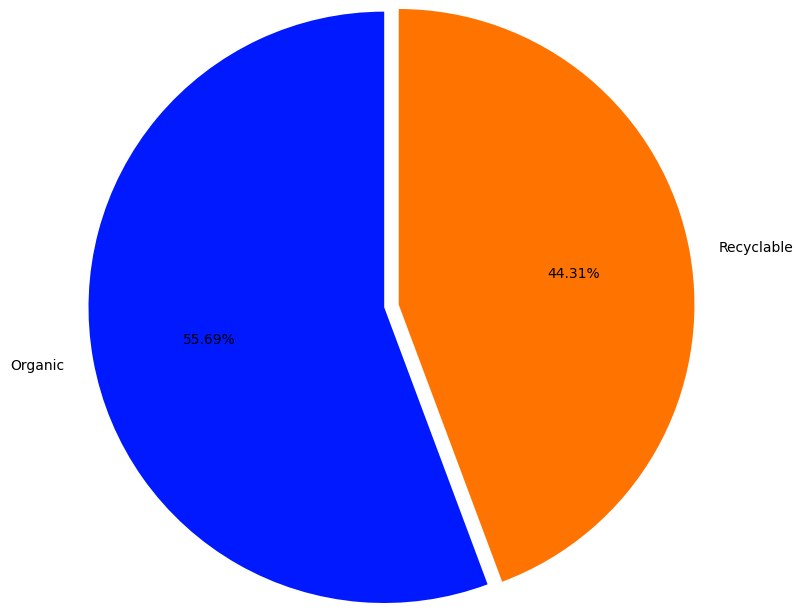

In [29]:
colors = ['#0019FF','#FF7300']
plt.pie(data.label.value_counts(),startangle=90,explode=[0.05,0.05],autopct='%0.2f%%',
        labels=['Organic', 'Recyclable'], colors= colors,radius=2)
plt.show()

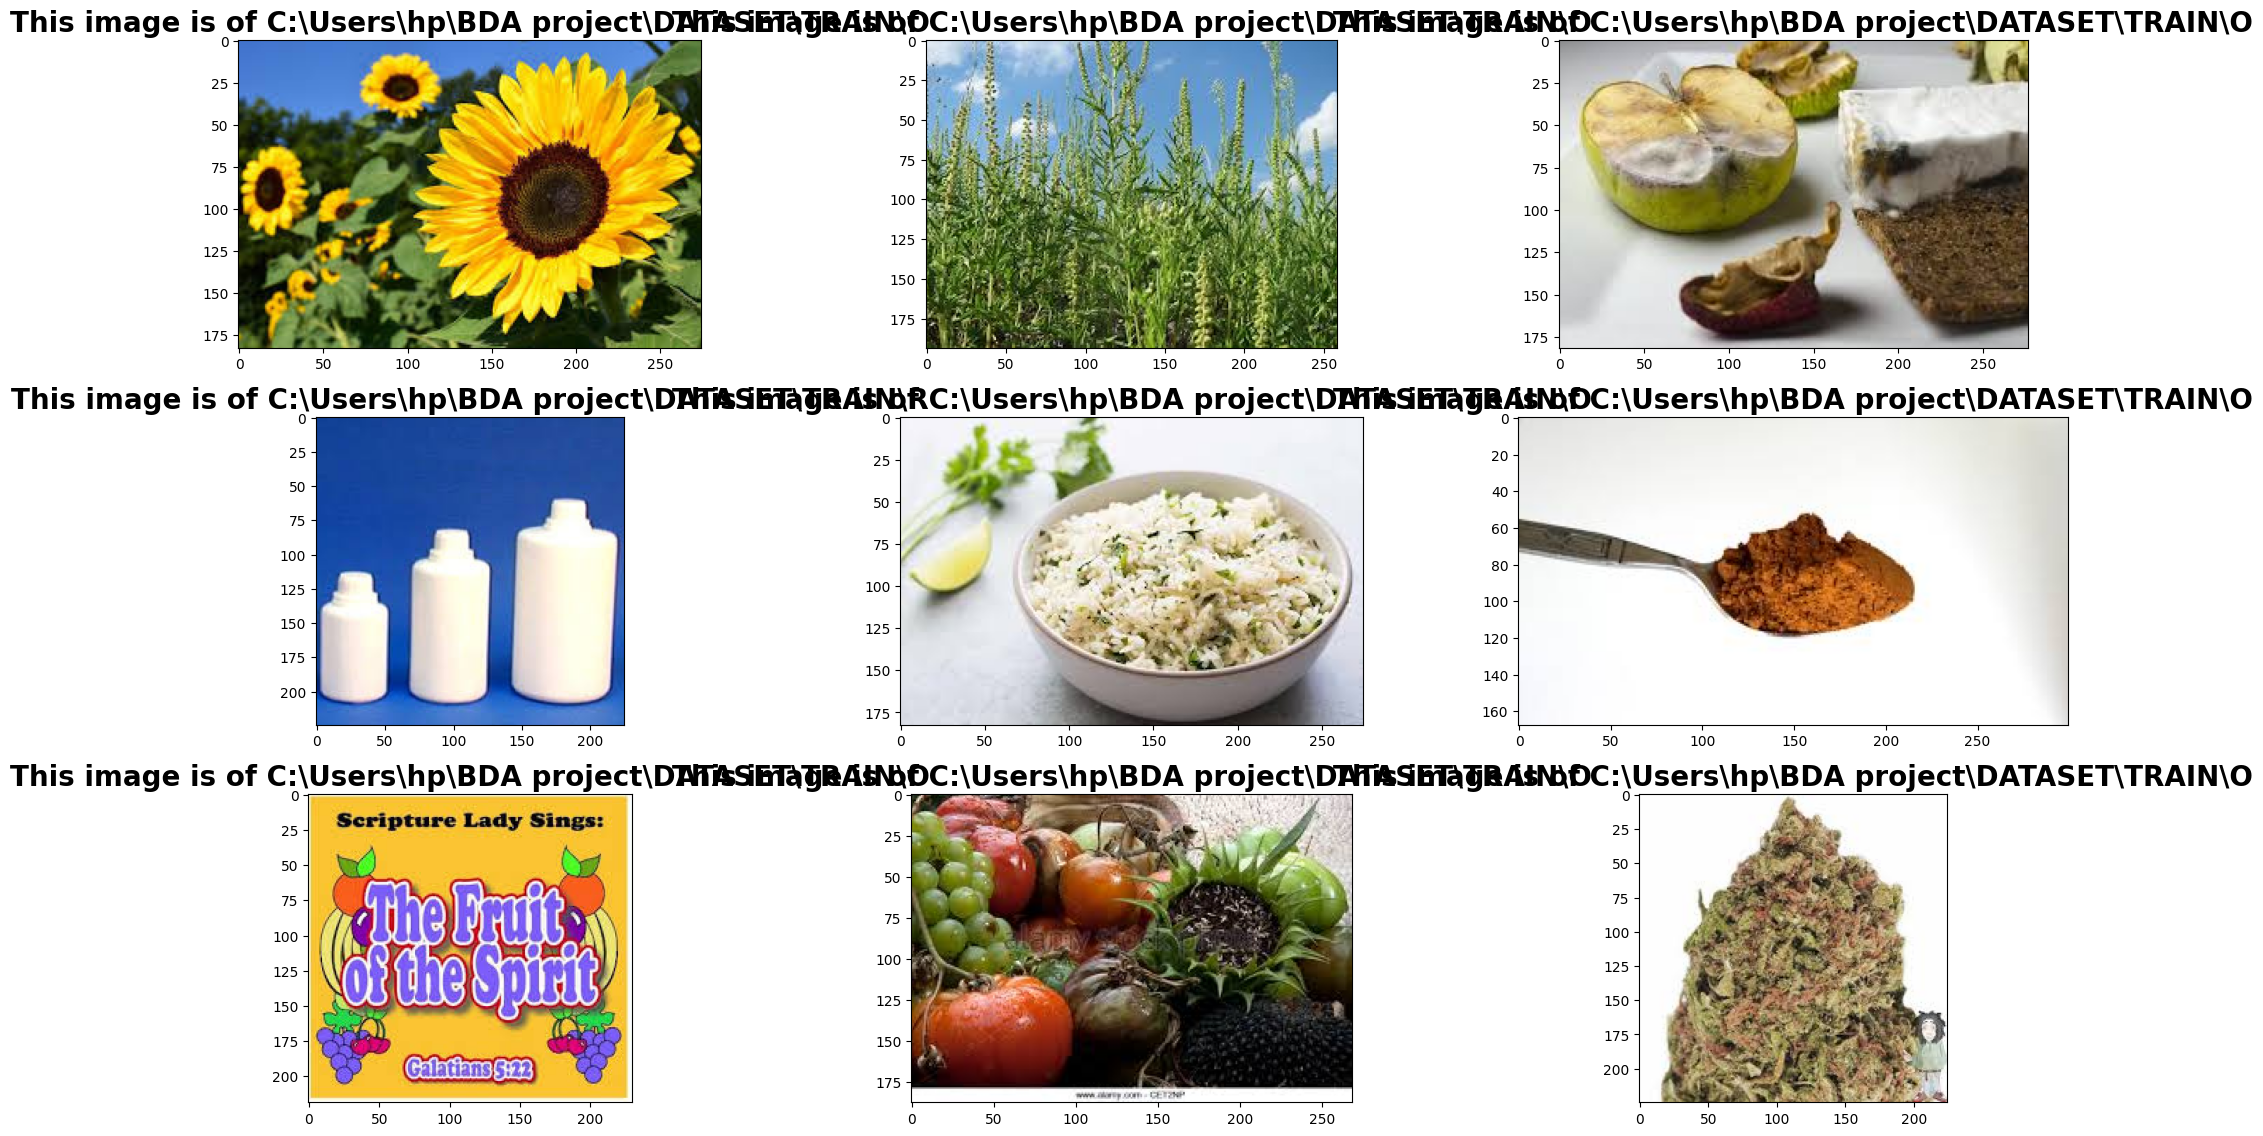

In [30]:
plt.figure(figsize=(20,15))
for i in range(9):
    plt.subplot(4,3,(i%12)+1)
    index=np.random.randint(15000)
    plt.title('This image is of {0}'.format(data.label[index]),fontdict={'size':20,'weight':'bold'})
    plt.imshow(data.image[index])
    plt.tight_layout()

In [31]:
className = glob(train_path + '/*' )
numberOfClass = len(className)
print("Number Of Classes: ",numberOfClass)



model = Sequential()
model.add(Conv2D(32,(3,3),input_shape = (224,224,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))  
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(128,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(numberOfClass)) # output
model.add(Activation("sigmoid"))

model.compile(loss = "binary_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])

batch_size = 256
plot_model(model)

train_datagen = ImageDataGenerator(rescale= 1./255)
test_datagen = ImageDataGenerator(rescale= 1./255)
train = train_datagen.flow_from_directory(
        train_path, 
        target_size= (224,224),
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

test = test_datagen.flow_from_directory(
        test_path, 
        target_size= (224,224),
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

hist = model.fit_generator(
        generator = train_generator,
        epochs=10,
        validation_data = test_generator)


Number Of Class:  2
You must install pydot (`pip install pydot`) for `plot_model` to work.
Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


AttributeError: 'Sequential' object has no attribute 'fit_generator'

In [10]:
className = glob(train_path + '/*' )
numberOfClass = len(className)
print("Number Of Class: ",numberOfClass)


NameError: name 'train_path' is not defined

In [9]:
from tensorflow.keras.layers import Activation
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization, Activation
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, Dropout, Conv2D
# from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
# from keras.utils.vis_utils import plot_model
from glob import glob

model = Sequential()
model.add(Conv2D(32,(3,3),input_shape = (224,224,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))  
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(128,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(numberOfClass)) # output
model.add(Activation("sigmoid"))

model.compile(loss = "binary_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])

batch_size = 256


NameError: name 'numberOfClass' is not defined

In [33]:
train_datagen = ImageDataGenerator(rescale= 1./255)
test_datagen = ImageDataGenerator(rescale= 1./255)
train = train_datagen.flow_from_directory(
        train_path, 
        target_size= (224,224),
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

test = test_datagen.flow_from_directory(
        test_path, 
        target_size= (224,224),
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [34]:
hist = model.fit(
    x=train,
    epochs=5,
    validation_data=test
)


Epoch 1/5
89/89 ━━━━━━━━━━━━━━━━━━━━ 1080s 12s/step - accuracy: 0.7074 - loss: 0.6166 - val_accuracy: 0.8743 - val_loss: 0.3326
Epoch 2/5
89/89 ━━━━━━━━━━━━━━━━━━━━ 331s 4s/step - accuracy: 0.8273 - loss: 0.4154 - val_accuracy: 0.8814 - val_loss: 0.3178
Epoch 3/5
89/89 ━━━━━━━━━━━━━━━━━━━━ 396s 4s/step - accuracy: 0.8473 - loss: 0.3692 - val_accuracy: 0.8778 - val_loss: 0.3176
Epoch 4/5
89/89 ━━━━━━━━━━━━━━━━━━━━ 324s 4s/step - accuracy: 0.8659 - loss: 0.3445 - val_accuracy: 0.8886 - val_loss: 0.2965
Epoch 5/5
89/89 ━━━━━━━━━━━━━━━━━━━━ 346s 4s/step - accuracy: 0.8718 - loss: 0.3203 - val_accuracy: 0.8930 - val_loss: 0.2759


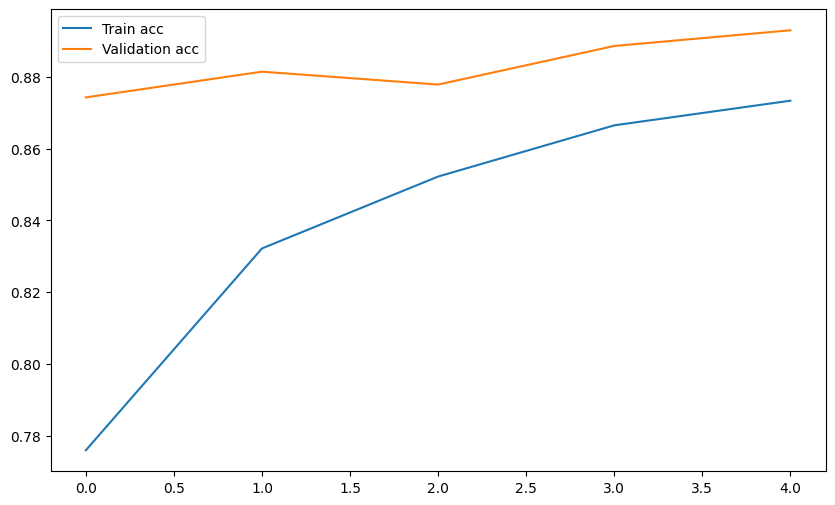

In [35]:
plt.figure(figsize=[10,6])
plt.plot(hist.history["accuracy"], label = "Train acc")
plt.plot(hist.history["val_accuracy"], label = "Validation acc")
plt.legend()
plt.show()

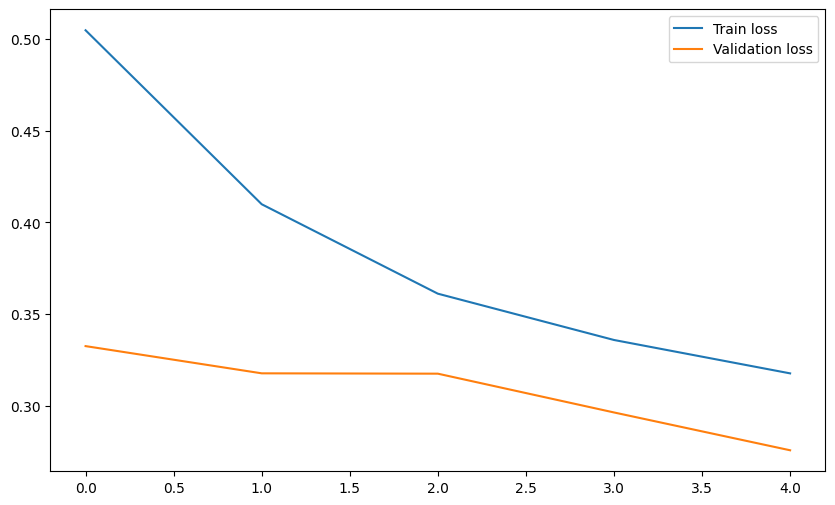

In [37]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'], label = "Train loss")
plt.plot(hist.history['val_loss'], label = "Validation loss")
plt.legend()
plt.show()

In [4]:
def predict_func(img): 
    plt.figure(figsize=(6,4))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.tight_layout()
    img = cv2.resize(img, (224, 224))
    img = np.reshape(img, [-1, 224, 224,3])
    result = np.argmax(model.predict(img))
    if result == 0: print("\033[94m"+"This image -> Recyclable"+"\033[0m")
    elif result ==1: print("\033[94m"+"This image -> Organic"+"\033[0m")

In [8]:
model.load_weights('model-weights.h5')

NameError: name 'model' is not defined

In [2]:
test_img = cv2.imread("DATASET\download (1).jpeg")
predict_func(test_img)

NameError: name 'cv2' is not defined

In [43]:
model.save('model-weights.h5')


In [44]:
model.save('model-weights.keras')